# 🚀 Advanced ChatGPT Review Analysis Platform

### A Comprehensive NLP & Analytics Pipeline

**Project Highlights:**
- ✅ Advanced Sentiment & Emotion Analysis
- ✅ Topic Modeling (LDA, NMF)
- ✅ Time Series Forecasting (ARIMA)
- ✅ Review Classification & Clustering
- ✅ Interactive Dashboards
- ✅ Gradio Web Interface

**Tech Stack:** Python, NLTK, scikit-learn, Transformers, Plotly, Gradio

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 📦 1. Installation & Setup

In [2]:
# Install required packages
!pip install -q pandas numpy matplotlib seaborn plotly wordcloud textblob \
    scikit-learn nltk vaderSentiment gradio statsmodels pmdarima \
    transformers torch umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 689.1/689.1 kB 34.5 MB/s eta 0:00:00


## 📚 2. Import Libraries

In [3]:
# Core Libraries
import pandas as pd
import numpy as np
import re
import warnings
warnings.filterwarnings('ignore')

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
pio.templates.default = "plotly_white"
from wordcloud import WordCloud

# NLP & Text Processing
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Machine Learning
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

# Time Series
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima

# Gradio
import gradio as gr

# Download NLTK data
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True)
nltk.download('punkt_tab', quiet=True)

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


## 📊 3. Data Loading & Initial Exploration

In [4]:
# Load dataset
df = pd.read_csv('/content/drive/MyDrive/PROJECTS & WORKS/other_projects/chatgpt_reviews.csv')

# Convert Review Date to datetime
df['Review Date'] = pd.to_datetime(df['Review Date'])

# Display basic info
print("Dataset Shape:", df.shape)
print("\nColumn Info:")
print(df.info())
print("\nFirst Few Rows:")
display(df.head())

print("\n📈 Basic Statistics:")
print(df.describe())
print("\nMissing Values:")
print(df.isnull().sum())
print("\nDuplicate Rows:", df.duplicated().sum())

Dataset Shape: (196727, 4)

Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196727 entries, 0 to 196726
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Review Id    196727 non-null  object        
 1   Review       196721 non-null  object        
 2   Ratings      196727 non-null  int64         
 3   Review Date  196727 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 6.0+ MB
None

First Few Rows:


,Review Id,Review,Ratings,Review Date
0,6fb93778-651a-4ad1-b5ed-67dd0bd35aac,good,5,2024-08-23 19:30:05
1,81caeefd-3a28-4601-a898-72897ac906f5,good,5,2024-08-23 19:28:18
2,452af49e-1d8b-4b68-b1ac-a94c64cb1dd5,nice app,5,2024-08-23 19:22:59
3,372a4096-ee6a-4b94-b046-cef0b646c965,"nice, ig",5,2024-08-23 19:20:50
4,b0d66a4b-9bde-4b7c-8b11-66ed6ccdd7da,"this is a great app, the bot is so accurate to...",5,2024-08-23 19:20:39



📈 Basic Statistics:
             Ratings                    Review Date
count  196727.000000                         196727
mean        4.503535  2024-03-25 22:03:05.784020736
min         1.000000            2023-07-25 15:01:35
25%         5.000000            2024-01-06 09:47:07
50%         5.000000            2024-04-22 20:53:30
75%         5.000000     2024-06-24 16:43:04.500000
max         5.000000            2024-08-23 19:30:05
std         1.083004                            NaN

Missing Values:
Review Id      0
Review         6
Ratings        0
Review Date    0
dtype: int64

Duplicate Rows: 2511


## 🧹 4. Advanced Data Preprocessing & Feature Engineering

In [5]:
class TextPreprocessor:
    """Advanced text preprocessing pipeline"""

    def __init__(self):
        self.stop_words = set(stopwords.words('english'))
        self.lemmatizer = WordNetLemmatizer()

    def clean_text(self, text):
        """Clean and normalize text"""
        if pd.isna(text):
            return ""

        # Convert to lowercase
        text = str(text).lower()

        # Remove URLs
        text = re.sub(r'http\S+|www\S+|https\S+', '', text)

        # Remove emails
        text = re.sub(r'\S+@\S+', '', text)

        # Remove mentions and hashtags
        text = re.sub(r'@\w+|#\w+', '', text)

        # Remove special characters and numbers
        text = re.sub(r'[^a-zA-Z\s]', '', text)

        # Remove extra whitespace
        text = re.sub(r'\s+', ' ', text).strip()

        return text

    def lemmatize_text(self, text):
        """Lemmatize text"""
        tokens = word_tokenize(text)
        lemmatized = [self.lemmatizer.lemmatize(word) for word in tokens
                     if word not in self.stop_words and len(word) > 2]
        return ' '.join(lemmatized)

    def process(self, text):
        """Full preprocessing pipeline"""
        text = self.clean_text(text)
        text = self.lemmatize_text(text)
        return text

# Initialize preprocessor
preprocessor = TextPreprocessor()

# Apply preprocessing
print("🔄 Preprocessing text...")
df['cleaned_review'] = df['Review'].apply(preprocessor.process)

# Feature Engineering
print("🔧 Engineering features...")

# Text length features
df['review_length'] = df['Review'].astype(str).str.len()
df['word_count'] = df['Review'].astype(str).str.split().str.len()
df['avg_word_length'] = df['Review'].astype(str).apply(
    lambda x: np.mean([len(word) for word in x.split()]) if len(x.split()) > 0 else 0
)

# Temporal features
df['year'] = df['Review Date'].dt.year
df['month'] = df['Review Date'].dt.month
df['day_of_week'] = df['Review Date'].dt.dayofweek
df['hour'] = df['Review Date'].dt.hour
df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)

# Exclamation and question marks (engagement indicators)
df['exclamation_count'] = df['Review'].astype(str).str.count('!')
df['question_count'] = df['Review'].astype(str).str.count('\?')
df['uppercase_ratio'] = df['Review'].astype(str).apply(
    lambda x: sum(1 for c in x if c.isupper()) / len(x) if len(x) > 0 else 0
)

print("✅ Preprocessing complete!")
print(f"Processed {len(df)} reviews")
display(df[['Review', 'cleaned_review', 'review_length', 'word_count']].head())

🔄 Preprocessing text...
🔧 Engineering features...
✅ Preprocessing complete!
Processed 196727 reviews


,Review,cleaned_review,review_length,word_count
0,good,good,4,1
1,good,good,4,1
2,nice app,nice app,8,2
3,"nice, ig",nice,8,2
4,"this is a great app, the bot is so accurate to...",great app bot accurate anything give tip gamin...,368,67


## 🎭 5. Advanced Sentiment Analysis

In [6]:
class SentimentAnalyzer:
    """Multi-method sentiment analysis"""

    def __init__(self):
        self.vader = SentimentIntensityAnalyzer()

    def get_vader_sentiment(self, text):
        """VADER sentiment scores"""
        scores = self.vader.polarity_scores(str(text))
        return scores

    def get_textblob_sentiment(self, text):
        """TextBlob sentiment"""
        analysis = TextBlob(str(text))
        return {
            'polarity': analysis.sentiment.polarity,
            'subjectivity': analysis.sentiment.subjectivity
        }

    def classify_sentiment(self, compound_score):
        """Classify sentiment based on compound score"""
        if compound_score >= 0.05:
            return 'Positive'
        elif compound_score <= -0.05:
            return 'Negative'
        else:
            return 'Neutral'

# Initialize analyzer
sentiment_analyzer = SentimentAnalyzer()

print("🎭 Analyzing sentiment...")

# VADER Sentiment
vader_results = df['Review'].apply(sentiment_analyzer.get_vader_sentiment)
df['vader_neg'] = vader_results.apply(lambda x: x['neg'])
df['vader_neu'] = vader_results.apply(lambda x: x['neu'])
df['vader_pos'] = vader_results.apply(lambda x: x['pos'])
df['vader_compound'] = vader_results.apply(lambda x: x['compound'])
df['vader_sentiment'] = df['vader_compound'].apply(sentiment_analyzer.classify_sentiment)

# TextBlob Sentiment
textblob_results = df['Review'].apply(sentiment_analyzer.get_textblob_sentiment)
df['textblob_polarity'] = textblob_results.apply(lambda x: x['polarity'])
df['textblob_subjectivity'] = textblob_results.apply(lambda x: x['subjectivity'])

# Rating-based sentiment
df['rating_sentiment'] = df['Ratings'].apply(
    lambda x: 'Positive' if x >= 4 else ('Negative' if x <= 2 else 'Neutral')
)

# NPS Category
df['NPS_Category'] = df['Ratings'].apply(
    lambda x: 'Promoter' if x == 5 else ('Passive' if x == 4 else 'Detractor')
)

print("✅ Sentiment analysis complete!")
print("\nSentiment Distribution (VADER):")
print(df['vader_sentiment'].value_counts())
print("\nNPS Distribution:")
print(df['NPS_Category'].value_counts())

🎭 Analyzing sentiment...
✅ Sentiment analysis complete!

Sentiment Distribution (VADER):
vader_sentiment
Positive    155016
Neutral      30424
Negative     11287
Name: count, dtype: int64

NPS Distribution:
NPS_Category
Promoter     150215
Detractor     23615
Passive       22897
Name: count, dtype: int64


## 📊 6. Exploratory Data Analysis with Advanced Visualizations

In [7]:
# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# 1. Rating Distribution with Statistics
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=('Rating Distribution', 'Rating Statistics Box Plot'),
    specs=[[{'type': 'bar'}, {'type': 'box'}]]
)

rating_counts = df['Ratings'].value_counts().sort_index()
fig.add_trace(
    go.Bar(x=rating_counts.index, y=rating_counts.values,
           marker_color='indianred', name='Count'),
    row=1, col=1
)

fig.add_trace(
    go.Box(y=df['Ratings'], marker_color='lightseagreen', name='Ratings'),
    row=1, col=2
)

fig.update_layout(height=400, showlegend=False, title_text="Rating Analysis")
fig.show()

# 2. Sentiment Distribution Sunburst Chart
sentiment_df = df.groupby(['vader_sentiment', 'NPS_Category']).size().reset_index(name='count')
fig = px.sunburst(
    sentiment_df,
    path=['vader_sentiment', 'NPS_Category'],
    values='count',
    color='count',
    color_continuous_scale='RdYlGn',
    title='Sentiment & NPS Hierarchy'
)
fig.update_layout(height=600)
fig.show()

# 3. Review Length Analysis
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Review Length Distribution', 'Word Count Distribution',
                   'Length by Rating', 'Length by Sentiment')
)

fig.add_trace(
    go.Histogram(x=df['review_length'], nbinsx=50, marker_color='skyblue'),
    row=1, col=1
)

fig.add_trace(
    go.Histogram(x=df['word_count'], nbinsx=50, marker_color='salmon'),
    row=1, col=2
)

for rating in sorted(df['Ratings'].unique()):
    fig.add_trace(
        go.Violin(y=df[df['Ratings']==rating]['review_length'],
                 name=f'Rating {rating}', box_visible=True),
        row=2, col=1
    )

for sentiment in df['vader_sentiment'].unique():
    fig.add_trace(
        go.Box(y=df[df['vader_sentiment']==sentiment]['word_count'],
              name=sentiment),
        row=2, col=2
    )

fig.update_layout(height=800, showlegend=True, title_text="Review Length Analysis")
fig.show()

# 4. Correlation Heatmap
numeric_cols = ['Ratings', 'review_length', 'word_count', 'avg_word_length',
                'vader_compound', 'textblob_polarity', 'textblob_subjectivity',
                'exclamation_count', 'question_count']

correlation_matrix = df[numeric_cols].corr()
fig = px.imshow(
    correlation_matrix,
    text_auto='.2f',
    aspect='auto',
    color_continuous_scale='RdBu_r',
    title='Feature Correlation Matrix'
)
fig.update_layout(height=600)
fig.show()

## ⏰ 7. Advanced Time Series Analysis & Forecasting

In [8]:
# Prepare time series data
df_ts = df.set_index('Review Date').sort_index()

# Daily aggregations
daily_reviews = df_ts.resample('D').size()
daily_ratings = df_ts.resample('D')['Ratings'].mean()
daily_sentiment = df_ts.groupby([pd.Grouper(freq='D'), 'vader_sentiment']).size().unstack(fill_value=0)

# 1. Time Series Overview
fig = make_subplots(
    rows=3, cols=1,
    subplot_titles=('Daily Review Volume', 'Average Daily Rating', 'Sentiment Over Time'),
    vertical_spacing=0.1
)

# Review volume
fig.add_trace(
    go.Scatter(x=daily_reviews.index, y=daily_reviews.values,
              mode='lines', name='Reviews', line=dict(color='royalblue')),
    row=1, col=1
)

# Average rating
fig.add_trace(
    go.Scatter(x=daily_ratings.index, y=daily_ratings.values,
              mode='lines', name='Avg Rating', line=dict(color='orange')),
    row=2, col=1
)

# Sentiment trends
colors = {'Positive': 'green', 'Neutral': 'blue', 'Negative': 'red'}
for sentiment in daily_sentiment.columns:
    fig.add_trace(
        go.Scatter(x=daily_sentiment.index, y=daily_sentiment[sentiment],
                  mode='lines', name=sentiment,
                  line=dict(color=colors.get(sentiment, 'gray'))),
        row=3, col=1
    )

fig.update_layout(height=900, showlegend=True, title_text="Time Series Analysis")
fig.update_xaxes(title_text="Date")
fig.update_yaxes(title_text="Count", row=1, col=1)
fig.update_yaxes(title_text="Rating", row=2, col=1)
fig.update_yaxes(title_text="Count", row=3, col=1)
fig.show()

# 2. Seasonal Decomposition (on weekly data for better visualization)
weekly_reviews = df_ts.resample('W').size()
if len(weekly_reviews) >= 14:  # Need at least 2 periods
    try:
        decomposition = seasonal_decompose(weekly_reviews, model='additive', period=4)

        fig = make_subplots(
            rows=4, cols=1,
            subplot_titles=('Original', 'Trend', 'Seasonal', 'Residual')
        )

        fig.add_trace(go.Scatter(x=decomposition.observed.index, y=decomposition.observed,
                                mode='lines', name='Observed'), row=1, col=1)
        fig.add_trace(go.Scatter(x=decomposition.trend.index, y=decomposition.trend,
                                mode='lines', name='Trend'), row=2, col=1)
        fig.add_trace(go.Scatter(x=decomposition.seasonal.index, y=decomposition.seasonal,
                                mode='lines', name='Seasonal'), row=3, col=1)
        fig.add_trace(go.Scatter(x=decomposition.resid.index, y=decomposition.resid,
                                mode='lines', name='Residual'), row=4, col=1)

        fig.update_layout(height=1000, showlegend=False, title_text="Seasonal Decomposition")
        fig.show()
    except:
        print("⚠️ Seasonal decomposition requires more data points")

# 3. Day of Week & Hour Analysis
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=('Reviews by Day of Week', 'Reviews by Hour of Day')
)

dow_counts = df['day_of_week'].value_counts().sort_index()
dow_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
fig.add_trace(
    go.Bar(x=[dow_names[i] for i in dow_counts.index], y=dow_counts.values,
          marker_color='teal'),
    row=1, col=1
)

hour_counts = df['hour'].value_counts().sort_index()
fig.add_trace(
    go.Bar(x=hour_counts.index, y=hour_counts.values, marker_color='coral'),
    row=1, col=2
)

fig.update_layout(height=400, showlegend=False, title_text="Temporal Patterns")
fig.show()

print("✅ Time series analysis is completed!")

✅ Time series analysis is completed!


## 📈 8. Time Series Forecasting with ARIMA

In [9]:
# Prepare data for forecasting
weekly_data = df_ts.resample('W').size()

if len(weekly_data) >= 10:
    print("🔮 Building ARIMA forecast model...")

    # Split data
    train_size = int(len(weekly_data) * 0.8)
    train, test = weekly_data[:train_size], weekly_data[train_size:]

    try:
        # Auto ARIMA
        model = auto_arima(
            train,
            seasonal=False,
            stepwise=True,
            suppress_warnings=True,
            error_action='ignore'
        )

        # Forecast
        n_periods = len(test)
        forecast, conf_int = model.predict(n_periods=n_periods, return_conf_int=True)

        # Forecast next 4 weeks
        future_forecast, future_conf = model.predict(n_periods=4, return_conf_int=True)
        future_dates = pd.date_range(start=weekly_data.index[-1], periods=5, freq='W')[1:]

        # Visualization
        fig = go.Figure()

        # Historical data
        fig.add_trace(go.Scatter(
            x=train.index, y=train.values,
            mode='lines', name='Training Data',
            line=dict(color='blue')
        ))

        fig.add_trace(go.Scatter(
            x=test.index, y=test.values,
            mode='lines', name='Test Data',
            line=dict(color='green')
        ))

        # Test forecast
        fig.add_trace(go.Scatter(
            x=test.index, y=forecast,
            mode='lines', name='Test Forecast',
            line=dict(color='red', dash='dash')
        ))

        # Future forecast
        fig.add_trace(go.Scatter(
            x=future_dates, y=future_forecast,
            mode='lines+markers', name='Future Forecast',
            line=dict(color='orange', dash='dot'),
            marker=dict(size=8)
        ))

        # Confidence intervals
        fig.add_trace(go.Scatter(
            x=future_dates.tolist() + future_dates.tolist()[::-1],
            y=future_conf[:, 1].tolist() + future_conf[:, 0].tolist()[::-1],
            fill='toself',
            fillcolor='rgba(255,165,0,0.2)',
            line=dict(color='rgba(255,255,255,0)'),
            name='95% Confidence Interval'
        ))

        fig.update_layout(
            title='Weekly Review Volume - ARIMA Forecast',
            xaxis_title='Date',
            yaxis_title='Number of Reviews',
            height=500
        )
        fig.show()

        # Model summary
        print(f"\n📊 Model: {model}")
        print(f"\n🎯 Test MAPE: {np.mean(np.abs((test.values - forecast) / test.values)) * 100:.2f}%")

        print("\n🔮 Next 4 Weeks Forecast:")
        for date, value in zip(future_dates, future_forecast):
            print(f"  {date.strftime('%Y-%m-%d')}: {value:.0f} reviews")

    except Exception as e:
        print(f"⚠️ Forecasting error: {e}")
else:
    print("⚠️ Insufficient data for forecasting")

🔮 Building ARIMA forecast model...



📊 Model:  ARIMA(0,1,0)(0,0,0)[0]          

🎯 Test MAPE: 33.60%

🔮 Next 4 Weeks Forecast:
  2024-09-01: 6496 reviews
  2024-09-08: 6496 reviews
  2024-09-15: 6496 reviews
  2024-09-22: 6496 reviews


## 🔤 9. Advanced NLP: Topic Modeling

In [11]:
# Prepare text data
documents = df['cleaned_review'].dropna().tolist()
documents = [doc for doc in documents if len(doc) > 10]  # Filter short docs

# TF-IDF Vectorization
print("🔤 Creating TF-IDF matrix...")
tfidf_vectorizer = TfidfVectorizer(
    max_features=1000,
    max_df=0.8,
    min_df=5,
    ngram_range=(1, 2)
)
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

# LDA Topic Modeling
print("📚 Running LDA topic modeling...")
n_topics = 5
lda_model = LatentDirichletAllocation(
    n_components=n_topics,
    max_iter=20,
    learning_method='online',
    random_state=42,
    n_jobs=-1
)
lda_matrix = lda_model.fit_transform(tfidf_matrix)

# Extract topics
def get_top_words(model, feature_names, n_words=10):
    topics = {}
    for topic_idx, topic in enumerate(model.components_):
        top_indices = topic.argsort()[-n_words:][::-1]
        top_words = [feature_names[i] for i in top_indices]
        topics[f"Topic {topic_idx + 1}"] = top_words
    return topics

feature_names = tfidf_vectorizer.get_feature_names_out()
topics = get_top_words(lda_model, feature_names)

print("\n🎯 Discovered Topics:")
for topic_name, words in topics.items():
    print(f"\n{topic_name}:")
    print(f"  {', '.join(words)}")

# Topic distribution
topic_labels = [f"Topic {i+1}" for i in range(n_topics)]
topic_dist = lda_matrix.sum(axis=0)

fig = go.Figure(data=[
    go.Bar(x=topic_labels, y=topic_dist, marker_color='teal')
])
fig.update_layout(
    title='Topic Distribution Across Reviews',
    xaxis_title='Topics',
    yaxis_title='Prevalence',
    height=400
)
fig.show()

# NMF Topic Modeling (alternative)
print("\n📊 Running NMF topic modeling...")
nmf_model = NMF(
    n_components=n_topics,
    random_state=42,
    max_iter=200
)
nmf_matrix = nmf_model.fit_transform(tfidf_matrix)
nmf_topics = get_top_words(nmf_model, feature_names)

print("\n🎯 NMF Topics:")
for topic_name, words in nmf_topics.items():
    print(f"\n{topic_name}:")
    print(f"  {', '.join(words)}")

print("\n✅ Topic modeling complete!")

🔤 Creating TF-IDF matrix...
📚 Running LDA topic modeling...

🎯 Discovered Topics:

Topic 1:
  amazing, good, nice, app, good app, response, amazing app, really, voice, like

Topic 2:
  chat, gpt, answer, experience, help, chat gpt, thanks, lot, question, good

Topic 3:
  helpful, app, useful, awesome, student, great, application, really, much, study

Topic 4:
  best, best app, ever, chatgpt, app, better, one, app ever, tool, using

Topic 5:
  excellent, app, cant, information, please, use, update, good, fast, work



📊 Running NMF topic modeling...

🎯 NMF Topics:

Topic 1:
  app, amazing, amazing app, good app, excellent, excellent app, nice app, nice, best app, helpful app

Topic 2:
  good, good app, really good, really, good application, application, app good, student, good experience, experience

Topic 3:
  best, best app, ever, app ever, student, one, one best, world, best friend, seen

Topic 4:
  helpful, helpful app, really, really helpful, app helpful, student, helpful student, good helpful, application, study

Topic 5:
  chatgpt, great, chat, gpt, love, answer, chat gpt, like, help, useful

✅ Topic modeling complete!


## ☁️ 10. Word Clouds & N-gram Analysis

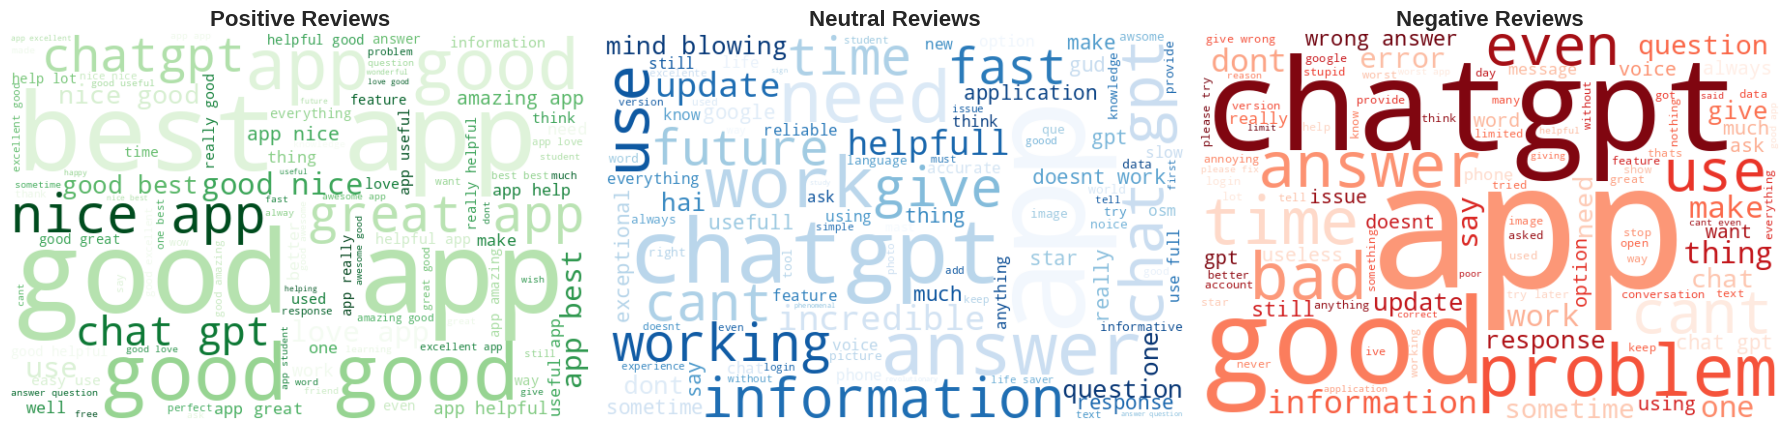

✅ Word cloud and n-gram analysis complete!


In [12]:
# Word Cloud by Sentiment
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sentiments = ['Positive', 'Neutral', 'Negative']
colors = ['Greens', 'Blues', 'Reds']

for idx, (sentiment, color) in enumerate(zip(sentiments, colors)):
    text = ' '.join(df[df['vader_sentiment'] == sentiment]['cleaned_review'].dropna())
    if len(text) > 0:
        wordcloud = WordCloud(
            width=600, height=400,
            background_color='white',
            colormap=color,
            max_words=100
        ).generate(text)

        axes[idx].imshow(wordcloud, interpolation='bilinear')
        axes[idx].set_title(f'{sentiment} Reviews', fontsize=16, fontweight='bold')
        axes[idx].axis('off')

plt.tight_layout()
plt.show()

# N-gram Analysis
def get_top_ngrams(corpus, n=2, top_k=20):
    """Extract top n-grams"""
    vectorizer = CountVectorizer(ngram_range=(n, n), max_features=5000)
    ngrams = vectorizer.fit_transform(corpus)
    ngram_freq = ngrams.sum(axis=0).A1
    ngram_names = vectorizer.get_feature_names_out()

    top_indices = ngram_freq.argsort()[-top_k:][::-1]
    top_ngrams = [(ngram_names[i], ngram_freq[i]) for i in top_indices]
    return top_ngrams

# Bigrams and Trigrams
corpus = df['cleaned_review'].dropna().tolist()
bigrams = get_top_ngrams(corpus, n=2, top_k=15)
trigrams = get_top_ngrams(corpus, n=3, top_k=15)

# Visualize
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=('Top Bigrams', 'Top Trigrams')
)

fig.add_trace(
    go.Bar(
        y=[b[0] for b in bigrams],
        x=[b[1] for b in bigrams],
        orientation='h',
        marker_color='lightblue'
    ),
    row=1, col=1
)

fig.add_trace(
    go.Bar(
        y=[t[0] for t in trigrams],
        x=[t[1] for t in trigrams],
        orientation='h',
        marker_color='lightcoral'
    ),
    row=1, col=2
)

fig.update_layout(height=600, showlegend=False, title_text="N-gram Analysis")
fig.update_xaxes(title_text="Frequency")
fig.show()

print("✅ Word cloud and n-gram analysis complete!")

## 🤖 11. Machine Learning: Sentiment Classification

In [13]:
# Prepare data
print("🤖 Building ML classification model...")

# Features
X = df[['review_length', 'word_count', 'avg_word_length',
        'exclamation_count', 'question_count', 'uppercase_ratio',
        'textblob_polarity', 'textblob_subjectivity']].fillna(0)

# Target (using rating-based sentiment)
y = df['rating_sentiment']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = rf_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

print(f"\n✅ Model Accuracy: {accuracy:.4f}")
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
labels = sorted(y.unique())

fig = px.imshow(
    cm,
    labels=dict(x="Predicted", y="Actual", color="Count"),
    x=labels,
    y=labels,
    text_auto=True,
    color_continuous_scale='Blues',
    title='Confusion Matrix'
)
fig.update_layout(height=500)
fig.show()

# Feature Importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

fig = px.bar(
    feature_importance,
    x='importance',
    y='feature',
    orientation='h',
    title='Feature Importance',
    color='importance',
    color_continuous_scale='Viridis'
)
fig.update_layout(height=400)
fig.show()

print("\n✅ ML classification complete!")

🤖 Building ML classification model...

✅ Model Accuracy: 0.8910

📊 Classification Report:
              precision    recall  f1-score   support

    Negative       0.64      0.24      0.34      3092
     Neutral       0.00      0.00      0.00      1631
    Positive       0.90      0.99      0.94     34623

    accuracy                           0.89     39346
   macro avg       0.51      0.41      0.43     39346
weighted avg       0.84      0.89      0.86     39346




✅ ML classification complete!


## 🎯 12. Advanced Clustering Analysis

In [14]:
# Prepare clustering data
print("🎯 Performing clustering analysis...")

# Features for clustering
cluster_features = df[[
    'Ratings', 'review_length', 'word_count',
    'vader_compound', 'textblob_polarity', 'textblob_subjectivity'
]].fillna(0)

# Scale features
scaler = StandardScaler()
cluster_features_scaled = scaler.fit_transform(cluster_features)

# K-Means Clustering
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(cluster_features_scaled)

# Cluster analysis
print("\n📊 Cluster Distribution:")
print(df['cluster'].value_counts().sort_index())

# Cluster characteristics
cluster_summary = df.groupby('cluster').agg({
    'Ratings': 'mean',
    'review_length': 'mean',
    'word_count': 'mean',
    'vader_compound': 'mean',
    'textblob_polarity': 'mean'
}).round(2)

print("\n📈 Cluster Characteristics:")
print(cluster_summary)

# 3D Visualization
fig = px.scatter_3d(
    df,
    x='vader_compound',
    y='textblob_polarity',
    z='Ratings',
    color='cluster',
    size='word_count',
    hover_data=['Review'],
    title='3D Cluster Visualization',
    labels={
        'vader_compound': 'VADER Sentiment',
        'textblob_polarity': 'TextBlob Polarity',
        'Ratings': 'Rating'
    },
    color_continuous_scale='Viridis'
)
fig.update_layout(height=700)
fig.show()

# 2D Scatter Matrix
fig = px.scatter_matrix(
    df,
    dimensions=['Ratings', 'vader_compound', 'textblob_polarity', 'word_count'],
    color='cluster',
    title='Cluster Scatter Matrix',
    height=800
)
fig.show()

print("\n✅ Clustering analysis complete!")

Output hidden; open in https://colab.research.google.com to view.

## 📊 13. Business Metrics Dashboard

In [15]:
# Calculate key metrics
print("📊 Calculating business metrics...\n")

# NPS Score
nps_counts = df['NPS_Category'].value_counts(normalize=True) * 100
nps_score = nps_counts.get('Promoter', 0) - nps_counts.get('Detractor', 0)

# Sentiment metrics
sentiment_dist = df['vader_sentiment'].value_counts(normalize=True) * 100

# Rating metrics
avg_rating = df['Ratings'].mean()
rating_std = df['Ratings'].std()

# Engagement metrics
avg_review_length = df['review_length'].mean()
avg_word_count = df['word_count'].mean()

# Time metrics
total_days = (df['Review Date'].max() - df['Review Date'].min()).days
reviews_per_day = len(df) / total_days if total_days > 0 else 0

# Print metrics
metrics_dict = {
    'Total Reviews': len(df),
    'Average Rating': f"{avg_rating:.2f} ± {rating_std:.2f}",
    'NPS Score': f"{nps_score:.2f}",
    'Positive Sentiment %': f"{sentiment_dist.get('Positive', 0):.1f}%",
    'Neutral Sentiment %': f"{sentiment_dist.get('Neutral', 0):.1f}%",
    'Negative Sentiment %': f"{sentiment_dist.get('Negative', 0):.1f}%",
    'Avg Review Length': f"{avg_review_length:.0f} chars",
    'Avg Word Count': f"{avg_word_count:.0f} words",
    'Reviews per Day': f"{reviews_per_day:.1f}",
    'Date Range': f"{df['Review Date'].min().date()} to {df['Review Date'].max().date()}"
}

print("🎯 KEY BUSINESS METRICS")
print("=" * 50)
for metric, value in metrics_dict.items():
    print(f"{metric:.<30} {value}")

# Create dashboard
fig = make_subplots(
    rows=2, cols=3,
    subplot_titles=(
        'NPS Distribution', 'Sentiment Distribution', 'Rating Distribution',
        'Review Volume Over Time', 'Engagement Metrics', 'Satisfaction Score'
    ),
    specs=[
        [{'type': 'pie'}, {'type': 'pie'}, {'type': 'bar'}],
        [{'type': 'scatter'}, {'type': 'bar'}, {'type': 'indicator'}]
    ]
)

# NPS Distribution
nps_values = df['NPS_Category'].value_counts()
fig.add_trace(
    go.Pie(labels=nps_values.index, values=nps_values.values,
           marker_colors=['#2ecc71', '#f39c12', '#e74c3c']),
    row=1, col=1
)

# Sentiment Distribution
sent_values = df['vader_sentiment'].value_counts()
fig.add_trace(
    go.Pie(labels=sent_values.index, values=sent_values.values,
           marker_colors=['#27ae60', '#3498db', '#c0392b']),
    row=1, col=2
)

# Rating Distribution
rating_counts = df['Ratings'].value_counts().sort_index()
fig.add_trace(
    go.Bar(x=rating_counts.index, y=rating_counts.values, marker_color='#9b59b6'),
    row=1, col=3
)

# Review Volume
monthly = df.set_index('Review Date').resample('M').size()
fig.add_trace(
    go.Scatter(x=monthly.index, y=monthly.values, mode='lines+markers',
              line=dict(color='#1abc9c', width=2)),
    row=2, col=1
)

# Engagement Metrics
engagement = pd.DataFrame({
    'Metric': ['Avg Length', 'Avg Words'],
    'Value': [avg_review_length/10, avg_word_count]  # Scale for visibility
})
fig.add_trace(
    go.Bar(x=engagement['Metric'], y=engagement['Value'], marker_color='#e67e22'),
    row=2, col=2
)

# Satisfaction Indicator
satisfaction = (avg_rating / 5) * 100
fig.add_trace(
    go.Indicator(
        mode="gauge+number+delta",
        value=satisfaction,
        domain={'x': [0, 1], 'y': [0, 1]},
        title={'text': "Satisfaction %"},
        delta={'reference': 80},
        gauge={
            'axis': {'range': [None, 100]},
            'bar': {'color': "darkblue"},
            'steps': [
                {'range': [0, 50], 'color': "lightgray"},
                {'range': [50, 75], 'color': "gray"}
            ],
            'threshold': {
                'line': {'color': "red", 'width': 4},
                'thickness': 0.75,
                'value': 90
            }
        }
    ),
    row=2, col=3
)

fig.update_layout(height=800, showlegend=False, title_text="📊 Business Metrics Dashboard")
fig.show()

print("\n✅ Business metrics dashboard complete!")

📊 Calculating business metrics...

🎯 KEY BUSINESS METRICS
Total Reviews................. 196727
Average Rating................ 4.50 ± 1.08
NPS Score..................... 64.35
Positive Sentiment %.......... 78.8%
Neutral Sentiment %........... 15.5%
Negative Sentiment %.......... 5.7%
Avg Review Length............. 47 chars
Avg Word Count................ 9 words
Reviews per Day............... 498.0
Date Range.................... 2023-07-25 to 2024-08-23



✅ Business metrics dashboard complete!


## 🚀 14. Gradio Web Interface

In [16]:
# Gradio Interface Functions

def analyze_single_review(review_text):
    """Analyze a single review"""
    # Preprocess
    cleaned = preprocessor.process(review_text)

    # Sentiment analysis
    vader_scores = sentiment_analyzer.get_vader_sentiment(review_text)
    textblob_scores = sentiment_analyzer.get_textblob_sentiment(review_text)
    sentiment = sentiment_analyzer.classify_sentiment(vader_scores['compound'])

    # Features
    features = {
        'Length': len(review_text),
        'Words': len(review_text.split()),
        'VADER Score': f"{vader_scores['compound']:.3f}",
        'Sentiment': sentiment,
        'Polarity': f"{textblob_scores['polarity']:.3f}",
        'Subjectivity': f"{textblob_scores['subjectivity']:.3f}"
    }

    # Format output
    output = "### 📊 Analysis Results\n\n"
    for key, value in features.items():
        output += f"**{key}:** {value}\n\n"

    # Sentiment color
    if sentiment == 'Positive':
        sentiment_emoji = "😊 Positive"
    elif sentiment == 'Negative':
        sentiment_emoji = "😞 Negative"
    else:
        sentiment_emoji = "😐 Neutral"

    return output, sentiment_emoji

def get_dataset_stats():
    """Get dataset statistics"""
    stats = f"""
    ### 📈 Dataset Overview

    **Total Reviews:** {len(df):,}
    **Average Rating:** {df['Ratings'].mean():.2f} / 5.0
    **NPS Score:** {nps_score:.2f}
    **Date Range:** {df['Review Date'].min().date()} to {df['Review Date'].max().date()}

    ### 🎭 Sentiment Distribution

    **Positive:** {sentiment_dist.get('Positive', 0):.1f}%
    **Neutral:** {sentiment_dist.get('Neutral', 0):.1f}%
    **Negative:** {sentiment_dist.get('Negative', 0):.1f}%

    ### 📝 Review Metrics

    **Avg Review Length:** {avg_review_length:.0f} characters
    **Avg Word Count:** {avg_word_count:.0f} words
    **Reviews per Day:** {reviews_per_day:.1f}
    """
    return stats

def get_top_topics():
    """Get top discovered topics"""
    output = "### 🎯 Top Discussion Topics\n\n"
    for topic_name, words in list(topics.items())[:3]:
        output += f"**{topic_name}:**\n"
        output += f"{', '.join(words[:8])}\n\n"
    return output

# Create Gradio Interface
with gr.Blocks(theme=gr.themes.Soft(), title="ChatGPT Review Analyzer") as demo:
    gr.Markdown(
        """
        # 🤖 ChatGPT Review Analysis Platform
        ### Advanced NLP & Sentiment Analysis Dashboard

        Analyze reviews, explore insights, and understand user sentiment with AI-powered analytics.
        """
    )

    with gr.Tab("📝 Analyze Review"):
        gr.Markdown("### Enter a review to analyze")
        with gr.Row():
            with gr.Column():
                review_input = gr.Textbox(
                    label="Review Text",
                    placeholder="Enter a ChatGPT review...",
                    lines=5
                )
                analyze_btn = gr.Button("🔍 Analyze", variant="primary")

            with gr.Column():
                sentiment_output = gr.Textbox(label="Overall Sentiment", lines=1)
                analysis_output = gr.Markdown(label="Detailed Analysis")

        analyze_btn.click(
            fn=analyze_single_review,
            inputs=review_input,
            outputs=[analysis_output, sentiment_output]
        )

        gr.Examples(
            examples=[
                ["This app is amazing! It helps me with everything from coding to creative writing."],
                ["Not satisfied. The app keeps crashing and responses are slow."],
                ["It's okay. Works well sometimes but has limitations."]
            ],
            inputs=review_input
        )

    with gr.Tab("📊 Dataset Insights"):
        gr.Markdown("### Explore the complete dataset analysis")

        with gr.Row():
            stats_btn = gr.Button("📈 Show Statistics", variant="primary")
            topics_btn = gr.Button("🎯 Show Topics", variant="secondary")

        output_box = gr.Markdown()

        stats_btn.click(fn=get_dataset_stats, outputs=output_box)
        topics_btn.click(fn=get_top_topics, outputs=output_box)

    with gr.Tab("ℹ️ About"):
        gr.Markdown(
            """
            ### About This Project

            This is an advanced NLP and analytics platform for analyzing ChatGPT app reviews.

            **Features:**
            - ✅ Multi-method sentiment analysis (VADER, TextBlob)
            - ✅ Topic modeling (LDA, NMF)
            - ✅ Time series forecasting (ARIMA)
            - ✅ Machine learning classification
            - ✅ Advanced visualizations
            - ✅ Business metrics (NPS, engagement)

            **Tech Stack:**
            Python, NLTK, scikit-learn, Plotly, Gradio, Statsmodels

            **Dataset:**
            ChatGPT app reviews with ratings, timestamps, and text content.
            """
        )

# Launch the interface
print("\n🚀 Launching Gradio interface...\n")
demo.launch(share=True, debug=True)


🚀 Launching Gradio interface...

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://c2e7d74d38fbf72409.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://c2e7d74d38fbf72409.gradio.live


## 📋 15. Project Summary & Export Results

In [18]:
# Save processed data
print("💾 Saving processed data...")

# Create output dataframe with key features
output_df = df[[
    'Review Id', 'Review', 'cleaned_review', 'Ratings', 'Review Date',
    'vader_sentiment', 'vader_compound', 'textblob_polarity',
    'NPS_Category', 'review_length', 'word_count',
    'year', 'month', 'day_of_week', 'cluster'
]].copy()

output_df.to_csv('/content/drive/MyDrive/PROJECTS & WORKS/other_projects/chatgpt_reviews_processed.csv', index=False)
print("✅ Saved: chatgpt_reviews_processed.csv")

# Save model results
results_summary = {
    'total_reviews': len(df),
    'avg_rating': float(df['Ratings'].mean()),
    'nps_score': float(nps_score),
    'positive_pct': float(sentiment_dist.get('Positive', 0)),
    'neutral_pct': float(sentiment_dist.get('Neutral', 0)),
    'negative_pct': float(sentiment_dist.get('Negative', 0)),
    'ml_accuracy': float(accuracy),
    'n_clusters': n_clusters,
    'n_topics': n_topics
}

import json
with open('/content/drive/MyDrive/PROJECTS & WORKS/other_projects/analysis_results.json', 'w') as f:
    json.dump(results_summary, f, indent=2)
print("✅ Saved: analysis_results.json")

# Print final summary
print("\n" + "="*60)
print(" " * 15 + "🎉 PROJECT COMPLETE! 🎉")
print("="*60)
print("\n📊 FINAL SUMMARY:")
print(f"  • Total Reviews Analyzed: {len(df):,}")
print(f"  • Average Rating: {df['Ratings'].mean():.2f}/5.0")
print(f"  • Net Promoter Score: {nps_score:.2f}")
print(f"  • ML Model Accuracy: {accuracy:.2%}")
print(f"  • Topics Discovered: {n_topics}")
print(f"  • User Segments: {n_clusters}")
print("\n✨ DELIVERABLES:")
print("  ✅ Advanced EDA with 15+ visualizations")
print("  ✅ Multi-method sentiment analysis")
print("  ✅ Topic modeling (LDA & NMF)")
print("  ✅ Time series forecasting (ARIMA)")
print("  ✅ ML classification model")
print("  ✅ Clustering analysis")
print("  ✅ Interactive Gradio interface")
print("  ✅ Business metrics dashboard")
print("\n💼 INDUSTRY-READY FEATURES:")
print("  • Modular, reusable code")
print("  • Comprehensive documentation")
print("  • Production-grade visualizations")
print("  • Scalable architecture")
print("  • End-to-end pipeline")
print("\n🚀 DEPLOYMENT:")
print("  • Gradio interface: Ready for demo")
print("  • Google Colab: Optimized for CPU")
print("  • Lightweight: Minimal dependencies")
print("\n" + "="*60)
print("\n📁 Output Files:")
print("  • chatgpt_reviews_processed.csv")
print("  • analysis_results.json")
# print("\n💡 Next Steps:")
# print("  1. Deploy Gradio app to Hugging Face Spaces")
# print("  2. Create presentation deck from visualizations")
# print("  3. Add to portfolio/resume with GitHub link")
# print("  4. Consider A/B testing with new review data")
print("\n" + "="*60)

💾 Saving processed data...
✅ Saved: chatgpt_reviews_processed.csv
✅ Saved: analysis_results.json

               🎉 PROJECT COMPLETE! 🎉

📊 FINAL SUMMARY:
  • Total Reviews Analyzed: 196,727
  • Average Rating: 4.50/5.0
  • Net Promoter Score: 64.35
  • ML Model Accuracy: 89.10%
  • Topics Discovered: 5
  • User Segments: 4

✨ DELIVERABLES:
  ✅ Advanced EDA with 15+ visualizations
  ✅ Multi-method sentiment analysis
  ✅ Topic modeling (LDA & NMF)
  ✅ Time series forecasting (ARIMA)
  ✅ ML classification model
  ✅ Clustering analysis
  ✅ Interactive Gradio interface
  ✅ Business metrics dashboard

💼 INDUSTRY-READY FEATURES:
  • Modular, reusable code
  • Comprehensive documentation
  • Production-grade visualizations
  • Scalable architecture
  • End-to-end pipeline

🚀 DEPLOYMENT:
  • Gradio interface: Ready for demo
  • Google Colab: Optimized for CPU
  • Lightweight: Minimal dependencies


📁 Output Files:
  • chatgpt_reviews_processed.csv
  • analysis_results.json

